# BEE313 Problem 4.1

Problem 4.1: Over a 7-hour period during which there was a rain event at a small stream in the Cascade mountains, both flow rates and the hydrologic tracer of the deuterium to hydrogen (δD) isotope ratio were measured. The flow rate was

q = [0.02, 0.06, 0.12, 0.08, 0.04, 0.03, 0.02]

in cubic meters per second for each of the 7 hours. The δD isotope values were measured as

δD = [-11, -6, -5, -8, -9, -10, -11]

in permil. Note: isotope ratios in permil can be treated as concentrations for the context of this problem. Rain begin during the second hour and had an average isotope value of δD = -4 permil. Estimate the total volume of water in the stream during this period that originated from rainfall from this storm?

 

### 4.1 Thought Process

> Although it says "over a 7 hour period" it is important to recognize that the rain event began during the second hour!

> Goal is to estimate the total volume of water in the stream during this period that originated from rainall from this storm

> The volume of channel precipitation, Pcp
   * approximated the hydrographj of runoff from channel precipiation to be a triangle...

Pcp = .5 * qpkc * (Tp+Tcm)

qpck is at Tp... Total time - Tp = Tc

Tp = 5 hours.... 2 to 7 


> OR OTHER METHOD...

Gives a fraction of water coming from rain event at peak flow..

q*/q(t) = (c(t) - Cb)/ (Cevent - Cbase)

> Now taking the above equation translate to total volume...

cb -> unsure... maybe 0
Cevemt  =  -4... the concentration during the rain event
q* -> unknown flow that we will sum
q(t) -> known list of flowrates...





In [8]:
# Import statements
import numpy as np


#sum(q*) = q(t)*((c(t) - Cb)/ (Cevent - Cbase))
### Not sure if the above equation is correct... still not entirely sure about the Cbase and Cevent and I am think that in the case of this...
###### C(t) -> 

q = np.array([0.02, 0.06, 0.12, 0.08, 0.04, 0.03, 0.02]) 
# assumed the c_t is all concentrations
c_t = np.array([-11, -6, -5, -8, -9, -10, -11])
# assumed Cevent is only concentrations from 2 hours and on
Cevent=np.array([-6, -5, -8, -9, -10, -11])
# assumed that Cbase was -4
Cbase = -4

### GUESSS...
##### took the concnetation and subtracted from base value then summed to create a fraction of sorts...
##### then I multiplied that by q..
##### Then I summed the array
##### This generated a value for total volume of water in the stream during this period that originated from rainfall from this storm
q_star = q*(np.sum((c_t - Cbase))/np.sum((Cevent - Cbase)))
print(q_star)
vol = np.sum(q_star)
print(f'total volume of water in the stream during this period that originated from rainfall from this storm: {vol:.3f} m^3')

[0.0256 0.0768 0.1536 0.1024 0.0512 0.0384 0.0256]
total volume of water in the stream during this period that originated from rainfall from this storm: 0.474 m^3


# BEE313 Problem 4.2

Problem 4.2: A local watershed consists of 4 square kilometers of good pasture and 6 square kilometers of fair woodlands and is drained by a 8km stream with a 6% slope. If the soils in this area are sandy loams and of average wetness, estimate what will be the peak flow in response to a 85mm storm that lasts 2.5 hours.



| Landcover           |            Soil        |  Area (sq mi) |  Fraction of Total area | Condition II Curve number |
|---------------------|------------------------|---------------|-------------------------|---------------------------|
| good  pasture       |  Sandy Loam (Group B)  |        4      |          .4             |             69            |
| fair woodlands      |  Sandy Loam (Group B)  |        6      |          .6             |             55            |

Curve numbers were found in table 10.11 of the Physical Hydrology Textbook...



Watt and Chow formula was used... to compute time of concentration
Tc = .128*((L/((S_c)^.5))^.47)
* Sc =  sine of channel slope angle (unitless)
* L = length of main stream (km)
* Tc = time of conentration (hr)

For time of rise 
Tr = (0.5*TP_star) + (0.6*Tc)
* TP_star = the duration of excess rainfall (hr)
* Tc = time of concentration estimated from Watt and Chow (hr)

Peak Flow Equation:

qpk = (.208*P_star*A)/(Tr)
* A = total area (km^2)
* qpk = peak flow (m^3/s)
* P_star = effective rainfall (mm)
* Tr = time of rise (hr)


In [10]:
# Objective: Find the peak flow with respect to the storm

# stream characteristics
### sine of channel slope angle
S_c = .06 # percentage 6%
### stream length
L = 8 # km

#storm
### total rainfall (P)
P = 85 #mm
### duration of the even
TP_star = 2.5 #hours

# average wetness of soil...

# areas
past_area = 4 # km
wood_area = 6 #km
### Total Area
A = 10

frac_past = past_area/A
frac_wood = wood_area/A

# Curve #
CN_past = 69
CN_wood = 55

# Step 1: Compute the weighted average curve number
CN_weight = (CN_past*frac_past) + (CN_wood*frac_wood)


# Step 2: Determine Smax...
### Smax is the watershed storage capacity that incorporates all watershed storage... including the interception, surface and subsurface storage. 
Smax = (25400/CN_weight)-254

# Step 3: Determine the effective rainfall
P_star = ((P-(.2*Smax))**2)/(P+(.8*Smax))


print(" "*3)
# Step 4: Estimate the Peak Discharge
## Watt and Chow formula was used...
Tc = .128*((L/((S_c)**.5))**.47)

# Step 5: Calculated the time to rise
Tr = (0.5*TP_star) + (0.6*Tc)

# Step 6: Calculated the Peak Flow 
qpk = (.208*P_star*A)/(Tr)
print(f'Peak Flow with respect to the 85mm storm event {qpk:.3f} m^3/s')

## Comparision of precipiration values from prior problem and this one.. mm/hr
event_text = 107/3.4
event_p2 = P/TP_star
print(event_text)
print(event_p2)

   
Peak Flow with respect to the 85mm storm event 15.727 m^3/s
31.47058823529412
34.0


# BEE313 Problem 4.3

Problem 4.3: Based on an extensive time series of rainfall-runoff data, a small catchment has the following half hour storm unit hydrograph (defined where 1unit corresponds to 1cm of effective precipitation): at t=1hr, q*=3.5m3/sec, at t=2hr, q*=17.5m3/sec, att=3hr, q*=8.75m3/sec, at t=4hr, q*=5.25m3/sec, at t=5hr, q*=3.25m3/sec, and at t=6hr, q*=1.5 m3/sec, where t is the time after the storm begins and q* is the event flow for that hour. If 1.5 cm of effective precipitation falls during a half-hour storm that starts at 8:00AM and 2.5 cm of effective precipitation falls during a half-hour storm that starts at 10:00AM, what is the expected peak flow out of this catchment and when does it occur?

 

Peak Outflow: 43.75 m^3/s
Time of Peak Outflow: 12:00:00 pm


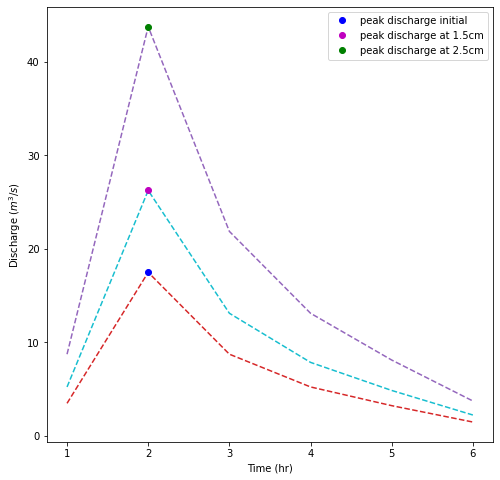

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import time
# based on a storm unit hydrograph

# Generate the two arrays for half hour storm unit hydrograph...
##### 1 unit = 1 cm of effective precip
## q* is the eventflow for that hour..
q_star = np.array([3.5, 17.5, 8.75, 5.25, 3.25, 1.5])
## time after storm begins
t = np.array([1,2,3,4,5,6,])

p_star1_5 = 1.5 # cm
p_star2_5 = 2.5 # cm

# Based on above hydrograph...
## If 1.5 cm of effective precip fall during a half hour storm that starts at 8am 
## and 2.5 cn of effective precip falls during a half hour storm event that starts at 10am...

### What is the expected peak flow out of this catchment? AND WHEN DOES IT OCCUR?


# So.. based on the fact that the hydrograph is for a half hour......
## The time intervals are scaled? 
## Baseically what will be done is the preipication will be multiplied by the qstar
### And then it will be determined when the expected peak flow out of catchment is and when it occurs

fig=plt.figure()
fig.set_size_inches(8,8,8)

# Step 1: Find inital peak flow...
ax3 = fig.add_subplot(111)
## found max value in this array...
init_max_index = np.where(q_star == np.max(q_star))[0][0]
tinit_max = t[init_max_index]
q_starinit_max =q_star[init_max_index]

ax3.plot(t, q_star, '--', color='tab:red')
ax3.plot(tinit_max, q_starinit_max,'b.', markersize = 12, label = "peak discharge initial")

# Step 2: Find the response hydrograph for effective rainfall of 1.5 cm. 
# ## Found the peak flow for this...
time_8 = 8 # am
q_star2 = q_star*p_star1_5
## found max value in this array...
init_max_index2 = np.where(q_star2 == np.max(q_star2))[0][0]
tinit2_max = t[init_max_index2]
q_star2init_max =q_star2[init_max_index2]

ax3.plot(t, q_star2, '--', color= 'tab:cyan')
ax3.plot(tinit2_max, q_star2init_max,'m.', markersize = 12, label = "peak discharge at 1.5cm")


# Step 3: Find the response hydrograph for effective rainfall of 2.5 cm. 
# ## Found the peak flow for this...
time_10 = 10 # am ...
q_star3 = q_star*p_star2_5
## found max value in this array...
init_max_index3 = np.where(q_star3 == np.max(q_star3))[0][0]
tinit3_max = t[init_max_index3]
q_star3init_max =q_star3[init_max_index2]

ax3.plot(t, q_star3, '--', color= 'tab:purple')
ax3.plot(tinit3_max, q_star3init_max,'g.', markersize = 12, label = "peak discharge at 2.5cm")


# Step 4: Compared Peak flows and their times... to determine peak flow and at what time
## peak discharge at 2.5cm was peak flow...

print(f'Peak Outflow: {q_star3init_max} m^3/s')

## got the proper time
pk_time = time(time_10+tinit3_max)
print(f'Time of Peak Outflow: {pk_time} pm')

##relevant axes and legend
ax3.legend()
ax3.set_xlabel('Time (hr)')
ax3.set_ylabel('Discharge ($m^3/s$)')
plt.show()


# BEE313 Problem 4.4

Problem 4.4: A storm with the unit hydrograph from problem 4.3 and 1cm in depth will be routed through a six-kilometer reach with a slope of 2.5 percent. If the depth of the water is 1.5m on average and the Mannings coefficient for this reach is 0.05, what will be the peak flow out of this reach and when will it occur?

In [ ]:
# code block